<a href="https://colab.research.google.com/github/justynigam/DS-Task/blob/main/Assignmentel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
import torchvision
import torchaudio
import warnings
warnings.filterwarnings('ignore')

In [2]:
Emp = pd.read_csv('Employee_Data.csv')

In [3]:
Emp.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
Emp.shape

(19158, 14)

In [6]:
Emp.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,object
company_size,object


In [9]:
Emp.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
Emp.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [13]:
Emp.duplicated().sum()

np.int64(0)

In [15]:
emp = Emp.copy()

In [18]:
emp['experience'] = emp['experience'].str.replace('<' , '').str.replace('>',' ')
emp['experience'].unique()

array([' 20', '15', '5', '1', '11', '13', '7', '17', '2', '16', '4', '10',
       '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [21]:
emp['last_new_job'] = emp['last_new_job'].str.replace('<' , '').str.replace('>',' ')
emp['last_new_job'] = emp['last_new_job'].replace('never' , '0')
emp['last_new_job'] = emp['last_new_job'].replace('nan' , '0')
emp['last_new_job'].unique()

array(['1', ' 4', '0', '4', '3', '2', nan], dtype=object)

In [24]:
emp['company_size'] = emp['company_size'].str.replace('50-99' , 'micro')
emp['company_size'] = emp['company_size'].str.replace('100-500' , 'min')
emp['company_size'] = emp['company_size'].str.replace('500-999' , 'macro')
emp['company_size'] = emp['company_size'].str.replace('+' , '').str.replace('10/49' , 'milli').str.replace('10000' , 'max').str.replace('1000-4999' , 'max').str.replace('5000-9999' , 'max')
emp['company_size'].unique()

array([nan, 'micro', '<10', 'max', '10milli49', 'min', 'macro'],
      dtype=object)

In [26]:
emp['city'] = emp['city'].str.replace('city_' , '')
emp['city'].unique()

array(['103', '40', '21', '115', '162', '176', '160', '46', '61', '114',
       '13', '159', '102', '67', '100', '16', '71', '104', '64', '101',
       '83', '105', '73', '75', '41', '11', '93', '90', '36', '20', '57',
       '152', '19', '65', '74', '173', '136', '98', '97', '50', '138',
       '82', '157', '89', '150', '70', '175', '94', '28', '59', '165',
       '145', '142', '26', '12', '37', '43', '116', '23', '99', '149',
       '10', '45', '80', '128', '158', '123', '7', '72', '106', '143',
       '78', '109', '24', '134', '48', '144', '91', '146', '133', '126',
       '118', '9', '167', '27', '84', '54', '39', '79', '76', '77', '81',
       '131', '44', '117', '155', '33', '141', '127', '62', '53', '25',
       '2', '69', '120', '111', '30', '1', '140', '179', '55', '14', '42',
       '107', '18', '139', '180', '166', '121', '129', '8', '31', '171'],
      dtype=object)

In [27]:
emp['experience'] = pd.to_numeric(emp['experience'])
emp['last_new_job'] = pd.to_numeric(emp['last_new_job'])
emp['city'] = pd.to_numeric(emp['city'])

display(emp.dtypes)

,0
enrollee_id,int64
city,int64
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,float64
company_size,object


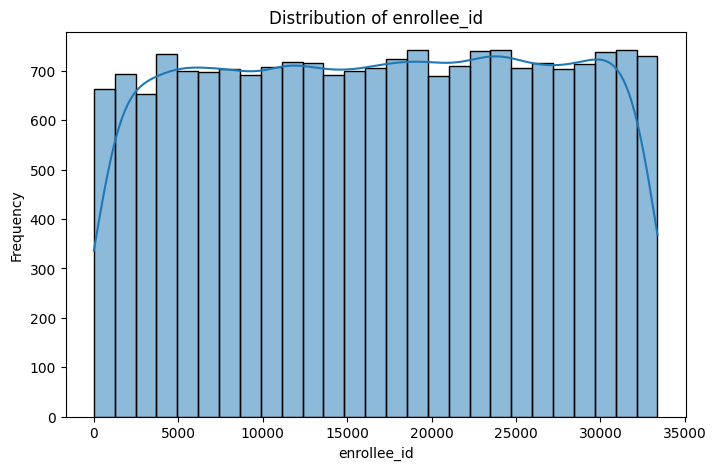

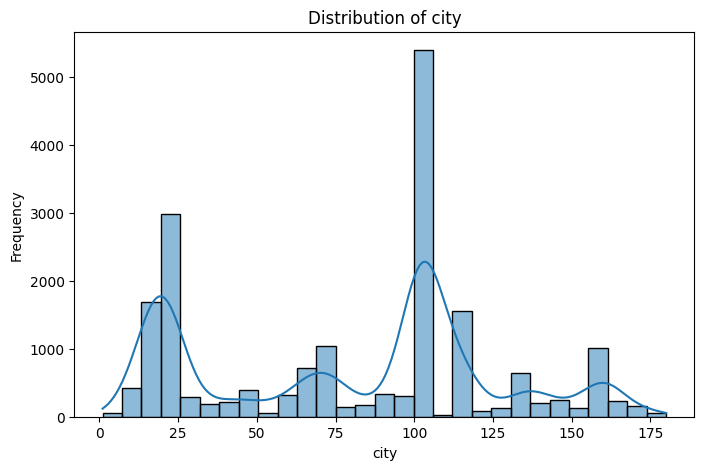

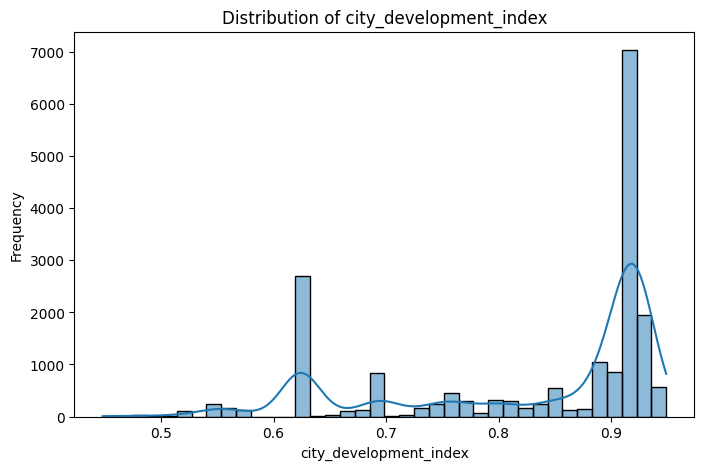

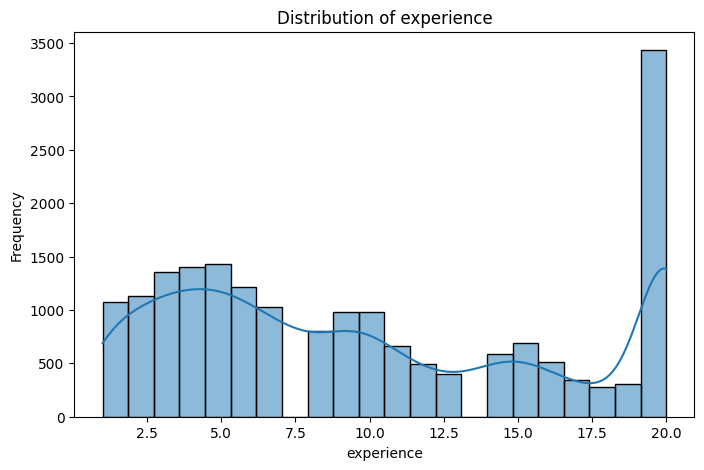

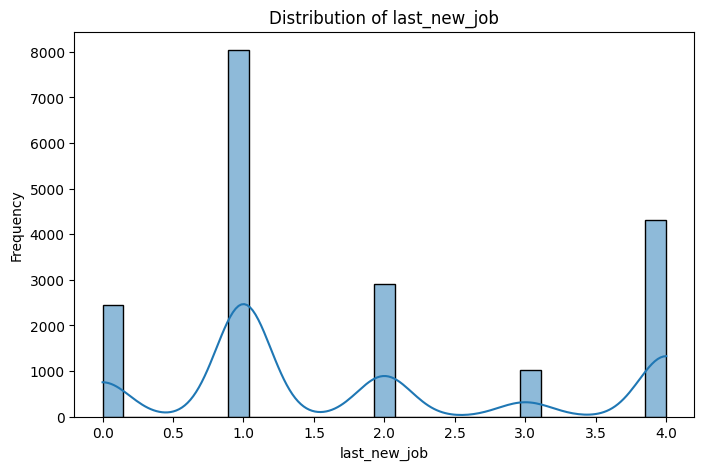

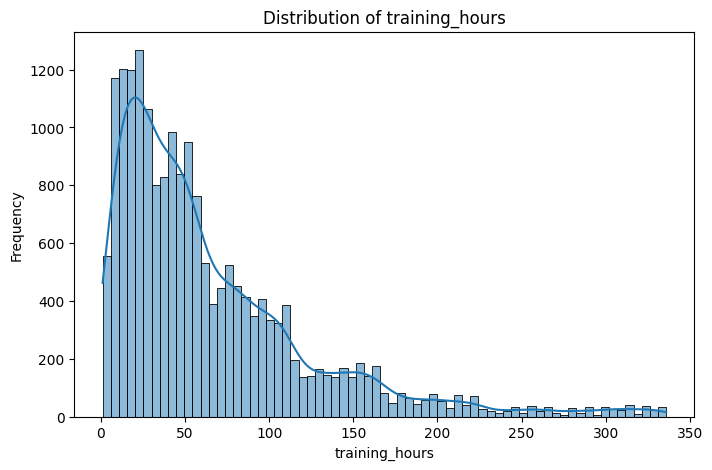

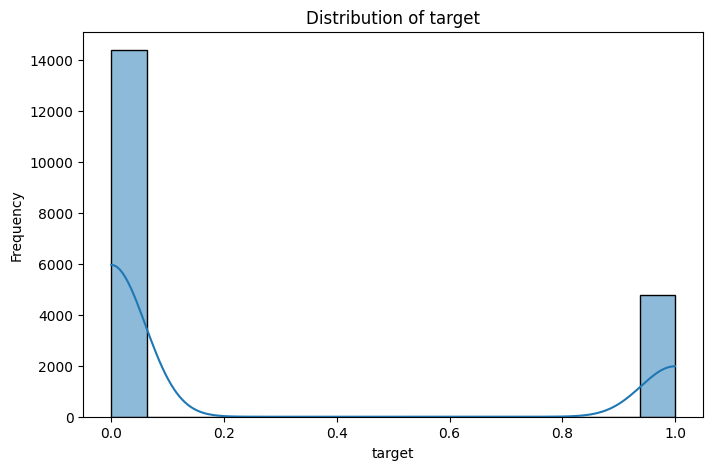

In [28]:
numeric_cols = emp.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=emp, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

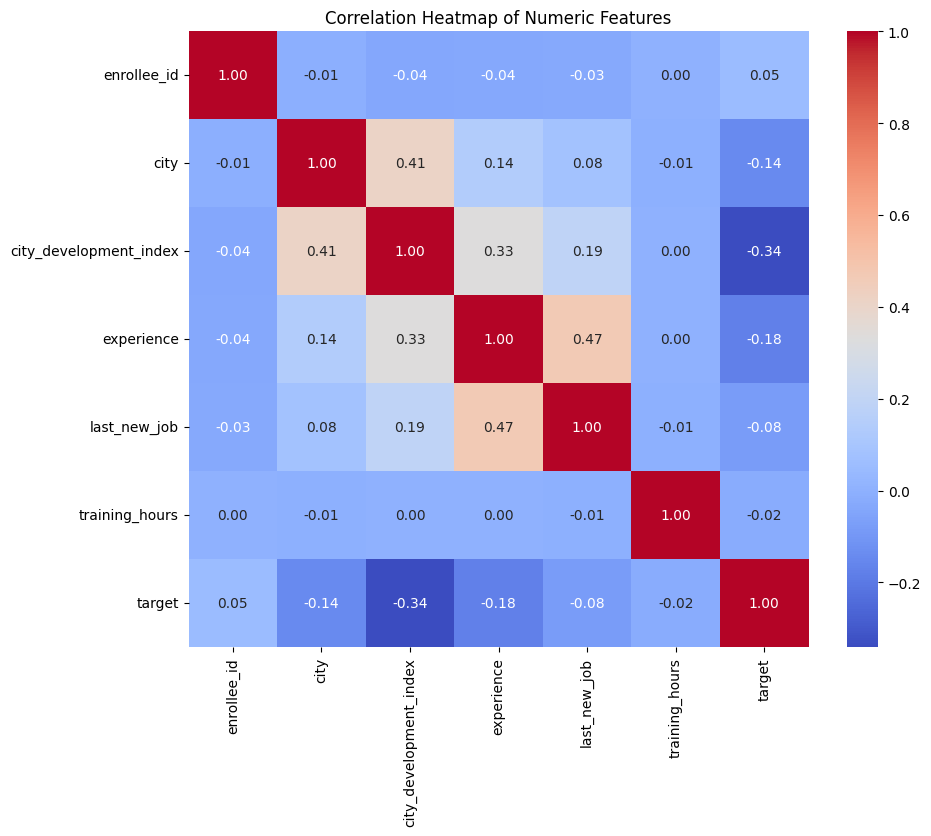

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(emp[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()